In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline

In [3]:
# data = pd.read_csv("./CSVs/output_250_31_4.csv", index_col=0)
data = pd.read_csv("./CSVs/output_250_15_3.csv", index_col=0)
data

,start,prod1,prod2,halt
0,1,1,1,0
1,1,1,2,0
2,1,1,3,0
3,1,1,4,0
4,1,1,5,0
...,...,...,...,...
3370,15,15,11,-1
3371,15,15,12,-1
3372,15,15,13,-1
3373,15,15,14,-1


In [4]:
data["halt"] = (data["halt"] >= 0) # thresholds halt. ONLY RUN ONCE
data

,start,prod1,prod2,halt
0,1,1,1,True
1,1,1,2,True
2,1,1,3,True
3,1,1,4,True
4,1,1,5,True
...,...,...,...,...
3370,15,15,11,False
3371,15,15,12,False
3372,15,15,13,False
3373,15,15,14,False


In [5]:
%matplotlib qt

unhalted = data[data["halt"] == False]
halted = data[data["halt"] == True]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("Starting word")
ax.set_ylabel("Production 1")
ax.set_zlabel("Production 2")

ax.scatter(unhalted["start"], unhalted["prod1"], unhalted["prod2"], label="Unhalted")
# ax.scatter(halted["start"], halted["prod1"], halted["prod2"], label="Halted")
ax.legend()

plt.show()

Only graphing unhalted shows some interesting patterns for CTSes with max three letters. Starting words 4 and 8 (so 00 and 000) always halt (which makes sense) and there's some interesting regularity with the patterns for production 1 and production 2. In the below graph, darker blacks mean more starting words didn't halt with the two productions.

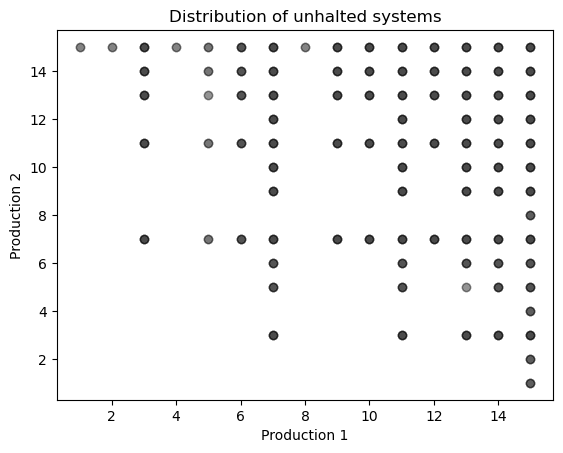

In [6]:
%matplotlib inline
fig, ax = plt.subplots()

ax.set_xlabel("Production 1")
ax.set_ylabel("Production 2")
ax.set_title("Distribution of unhalted systems")
ax.scatter(unhalted["prod1"], unhalted["prod2"], c=[[0, 0, 0, 1/10]])

plt.show()

In [24]:
from matplotlib.widgets import Slider, Button, RadioButtons

%matplotlib qt

fig, ax = plt.subplots()
ax.set_xlabel("Production 1")
ax.set_ylabel("Production 2")
ax.set_title("Distribution of unhalted systems for each starting word")

l, = ax.plot(unhalted[unhalted["start"] == 15]["prod1"], unhalted[unhalted["start"] == 15]["prod2"], "ro")

starting_words = [i + 1 for i in range(15)]

ax_start = fig.add_axes([0.25, 0.15, 0.65, 0.03])
startslider = Slider(
    ax_start, "Starting word", 1, 15,
    valinit=1.0, valstep=starting_words,
    color="green"
)

def update(val):
    startingword = startslider.val
    l.set_xdata(unhalted[unhalted["start"] == startingword]["prod1"])
    l.set_ydata(unhalted[unhalted["start"] == startingword]["prod2"])
    fig.canvas.draw_idle()

startslider.on_changed(update)

plt.show()